<img src="https://pbs.twimg.com/profile_images/1092394418135539713/eplLRcDN_400x400.jpg" width=80px style="text-align:right"><h1>The Internet of Production Alliance </h1>

## Preliminary data report for the [Make Project](https://makeafricaeu.org/)


Autor: Antonio de Jesus Anaya Hernandez, DevOps eng. for the IoPA.

Autor: The internet of Production Alliance, 2023.

Data was collected by "Fab Foundation", location: https://api.fablabs.io/0/labs.json

The Open Know Where (OKW) Standard is part of the Internet of Production Alliance and its members.

License: CC BY SA

![CC BY SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)

Python code used to download, parse, filter, sort and map the data:

In [1]:
import folium

In [2]:
from folium.plugins import HeatMap

In [3]:
import requests

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
url = "https://api.fablabs.io/0/labs.json"
response = requests.get(url)
data = response.json()

In [7]:
df = pd.DataFrame(data)

In [8]:
df = df[df['activity_status'] == 'active']

In [9]:
df = df.drop(columns=['id', 'kind_name', 'parent_id', 'blurb', 'description', 'slug', 'avatar_url', 'header_url'])

In [10]:
african_countries = {
    "DZ": "Algeria",
    "AO": "Angola",
    "BJ": "Benin",
    "BW": "Botswana",
    "BF": "Burkina Faso",
    "BI": "Burundi",
    "CM": "Cameroon",
    "CV": "Cape Verde",
    "CF": "Central African Republic",
    "TD": "Chad",
    "KM": "Comoros",
    "CG": "Congo",
    "CD": "Democratic Republic of the Congo",
    "CI": "Côte d'Ivoire",
    "DJ": "Djibouti",
    "EG": "Egypt",
    "GQ": "Equatorial Guinea",
    "ER": "Eritrea",
    "ET": "Ethiopia",
    "GA": "Gabon",
    "GM": "Gambia",
    "GH": "Ghana",
    "GN": "Guinea",
    "GW": "Guinea-Bissau",
    "KE": "Kenya",
    "LS": "Lesotho",
    "LR": "Liberia",
    "LY": "Libya",
    "MG": "Madagascar",
    "MW": "Malawi",
    "ML": "Mali",
    "MR": "Mauritania",
    "MU": "Mauritius",
    "YT": "Mayotte",
    "MA": "Morocco",
    "MZ": "Mozambique",
    "NA": "Namibia",
    "NE": "Niger",
    "NG": "Nigeria",
    "RW": "Rwanda",
    "RE": "Réunion",
    "SH": "Saint Helena",
    "ST": "São Tomé and Principe",
    "SN": "Senegal",
    "SC": "Seychelles",
    "SL": "Sierra Leone",
    "SO": "Somalia",
    "ZA": "South Africa",
    "SS": "South Sudan",
    "SD": "Sudan",
    "SZ": "Swaziland",
    "TZ": "Tanzania",
    "TG": "Togo",
    "TN": "Tunisia",
    "UG": "Uganda",
    "EH": "Western Sahara",
    "ZM": "Zambia",
    "ZW": "Zimbabwe"
}

In [11]:
africa_codes = african_countries.keys()

In [12]:
df = df[df['country_code'].isin(africa_codes)]

In [13]:
df = df[df['phone'].notna() & df['email'].notna() & (df['phone'] != '') & (df['email'] != '')]

In [14]:
df = df[df['latitude'].notna() & df['longitude'].notna() & (df['latitude'] != '') & (df['longitude'] != '')]

In [15]:
df.to_csv('make_african_countries.csv', index=False)

In [16]:
avg_lat = df['latitude'].mean()
avg_lon = df['longitude'].mean()
map = folium.Map(location=[avg_lat, avg_lon], zoom_start=3)

In [27]:
HeatMap(data=df[['latitude', 'longitude']].values, radius=8, max_zoom=7).add_to(map)

In [18]:
map

In [20]:
df['country_name'] = df['country_code'].map(african_countries)

In [21]:
result = df.groupby('country_name').size().sort_values(ascending=True)

Text(0, 0.5, 'Country')

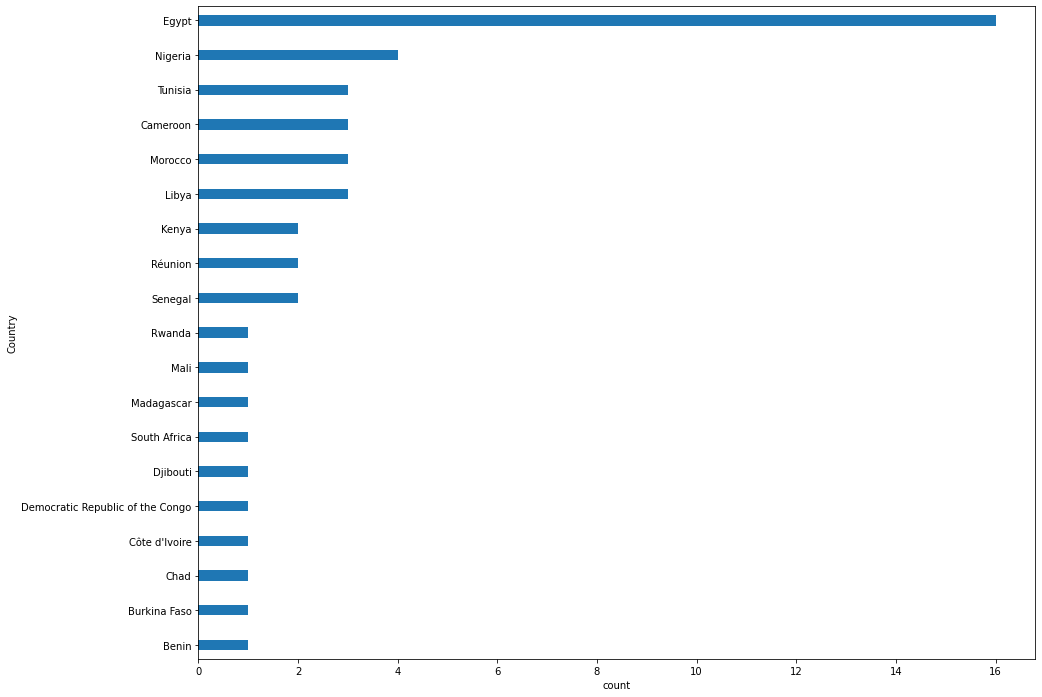

In [22]:
result.plot(kind='barh', rot=0, width=0.3, align='center', figsize=(15,12))
plt.xlabel("count")
plt.ylabel("Country")

In [23]:
result

country_name
Benin                                1
Burkina Faso                         1
Chad                                 1
Côte d'Ivoire                        1
Democratic Republic of the Congo     1
Djibouti                             1
South Africa                         1
Madagascar                           1
Mali                                 1
Rwanda                               1
Senegal                              2
Réunion                              2
Kenya                                2
Libya                                3
Morocco                              3
Cameroon                             3
Tunisia                              3
Nigeria                              4
Egypt                               16
dtype: int64

In [24]:
print("Countries:\t" + str(result.shape[0]) + " \nTotal fablabs:\t" + str(result.sum()))

Countries:	19 
Total fablabs:	48
